In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time
import tqdm
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from mpl_toolkits import mplot3d
from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from scipy.spatial.distance import euclidean
import random
import seaborn as sns

Using TensorFlow backend.


In [2]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

In [3]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

In [4]:
import pandas as pd
awid=pd.read_csv('AWID-CLS-R-Trn.csv',header=None,names=features)

/home/shaubhik_2111cs19/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
awid_test=pd.read_csv('AWID-CLS-R-Tst.csv',header=None,names=features)

In [6]:
awid

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,0,?,0.0,1.393665e+09,0.000006,0.000006,3599.522705,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
1795571,0,?,0.0,1.393665e+09,0.005067,0.005067,3599.527772,148,148,0,...,?,?,?,?,?,?,?,?,?,normal
1795572,0,?,0.0,1.393665e+09,0.010242,0.010242,3599.538014,54,54,0,...,?,?,?,?,?,?,?,?,?,normal
1795573,0,?,0.0,1.393665e+09,0.000007,0.000007,3599.538021,40,40,0,...,?,?,?,?,?,?,?,?,?,normal


In [7]:
awid_test

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393668e+09,0.000000,0.000000,0.000000,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
1,0,?,0.0,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
2,0,?,0.0,1.393668e+09,0.000141,0.000141,0.001197,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393668e+09,0.000156,0.000156,0.001353,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575638,0,?,0.0,1.393669e+09,0.000643,0.000643,1200.261948,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
575639,0,?,0.0,1.393669e+09,0.005485,0.005485,1200.267433,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
575640,0,?,0.0,1.393669e+09,0.008112,0.008112,1200.275545,124,124,0,...,1,0,0x0000,0,?,?,?,0,60,normal
575641,0,?,0.0,1.393669e+09,0.006147,0.006147,1200.281692,1524,1524,0,...,1,0,0x0000,0,?,?,?,0,1460,normal


In [8]:
awid.rename(columns = {'class':'label'}, inplace = True)

In [9]:
awid['label'].value_counts()

normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: label, dtype: int64

In [10]:
awid_test.rename(columns = {'class':'label'}, inplace = True)

In [11]:
awid_test['label'].value_counts()

normal           530785
impersonation     20079
injection         16682
flooding           8097
Name: label, dtype: int64

In [12]:
awid.replace({"?":None}, inplace=True)

In [13]:
# Below code gives percentage of null in every column
null_percentage = awid.isnull().sum()/awid.shape[0]*100

In [14]:
null_percentage

frame.interface_id                 0.000000
frame.dlt                        100.000000
frame.offset_shift                 0.000000
frame.time_epoch                   0.000000
frame.time_delta                   0.000000
                                    ...    
wlan.qos.bit4                     91.833257
wlan.qos.txop_dur_req             91.833257
wlan.qos.buf_state_indicated2     71.279339
data.len                          50.291467
label                              0.000000
Length: 155, dtype: float64

In [15]:
col_to_drop = null_percentage[null_percentage>60].keys()

In [16]:
awid.drop(labels=col_to_drop, axis=1, inplace=True)

In [17]:
awid_test.replace({"?":None}, inplace=True)

In [18]:
# Below code gives percentage of null in every column
null_percentage = awid_test.isnull().sum()/awid_test.shape[0]*100

In [19]:
col_to_drop_test = null_percentage[null_percentage>60].keys()

In [20]:
len(col_to_drop_test)

70

In [21]:
#We are dropping only columns meant to be dropped for awid

awid_test.drop(labels=col_to_drop, axis=1, inplace=True)

In [22]:
len(col_to_drop),len(col_to_drop_test)

(68, 70)

In [23]:
awid

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,label
0,0,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,0,...,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0,2851,1,None,None,None,None,normal
1,0,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,0,...,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,0,2159,1,None,None,None,None,normal
2,0,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,0,...,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,0,291,1,None,None,None,None,normal
3,0,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,0,...,00:13:33:87:62:6d,00:13:33:87:62:6d,0,3684,1,None,None,None,None,normal
4,0,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,0,...,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,0,3874,1,None,None,None,None,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,0,0.0,1.393665e+09,0.000006,0.000006,3599.522705,40,40,0,0,...,None,None,None,None,1,None,None,None,None,normal
1795571,0,0.0,1.393665e+09,0.005067,0.005067,3599.527772,148,148,0,0,...,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,0,2134,1,None,None,None,None,normal
1795572,0,0.0,1.393665e+09,0.010242,0.010242,3599.538014,54,54,0,0,...,20:64:32:54:c9:da,28:c6:8e:86:d3:d6,0,1442,1,None,None,None,None,normal
1795573,0,0.0,1.393665e+09,0.000007,0.000007,3599.538021,40,40,0,0,...,None,None,None,None,1,None,None,None,None,normal


In [24]:
import numpy as np  #try to replace nan with mean/std deiviation

awid = awid.replace(np.nan, 0)
awid_test=awid_test.replace(np.nan,0)

In [25]:
def remove_constant_value_features(awid):
    return [e for e in awid.columns if awid[e].nunique() == 1]

In [26]:
drop_col = remove_constant_value_features(awid)
drop_col

['frame.interface_id',
 'frame.offset_shift',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.present.rate',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'wlan.fc.version',
 'wlan.fc.order']

In [27]:
len(drop_col)

25

In [28]:
awid.drop(labels=drop_col, axis=1, inplace=True)

In [29]:
drop_col_test = remove_constant_value_features(awid_test)
drop_col_test

['frame.interface_id',
 'frame.offset_shift',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.present.rate',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'wlan.fc.version',
 'wlan.fc.order']

In [30]:
len(drop_col_test)

25

In [31]:
awid_test.drop(labels=drop_col_test, axis=1, inplace=True)

In [32]:
awid

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,label
0,1.393661e+09,0.000000,0.000000,0.000000,261,261,26,1,1,1,...,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0,2851,1,0,0,0,0,normal
1,1.393661e+09,0.024271,0.024271,0.024271,185,185,26,1,1,1,...,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,0,2159,1,0,0,0,0,normal
2,1.393661e+09,0.001631,0.001631,0.025902,185,185,26,1,1,1,...,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,0,291,1,0,0,0,0,normal
3,1.393661e+09,0.055325,0.055325,0.081227,159,159,26,1,1,1,...,00:13:33:87:62:6d,00:13:33:87:62:6d,0,3684,1,0,0,0,0,normal
4,1.393661e+09,0.000415,0.000415,0.081642,54,54,26,1,1,1,...,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,0,3874,1,0,0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,1.393665e+09,0.000006,0.000006,3599.522705,40,40,26,1,1,1,...,0,0,0,0,1,0,0,0,0,normal
1795571,1.393665e+09,0.005067,0.005067,3599.527772,148,148,26,1,1,1,...,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,0,2134,1,0,0,0,0,normal
1795572,1.393665e+09,0.010242,0.010242,3599.538014,54,54,26,1,1,1,...,20:64:32:54:c9:da,28:c6:8e:86:d3:d6,0,1442,1,0,0,0,0,normal
1795573,1.393665e+09,0.000007,0.000007,3599.538021,40,40,26,1,1,1,...,0,0,0,0,1,0,0,0,0,normal


In [33]:
awid_test

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,label
0,1.393668e+09,0.000000,0.000000,0.000000,1552,1552,26,1,1,1,...,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,2313,1,0xf6ddd9,0,0x0e5162ff,1488,normal
1,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,26,1,1,1,...,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,2314,1,0xf7ddd9,0,0xb07e1e45,1488,normal
2,1.393668e+09,0.000141,0.000141,0.001197,40,40,26,1,1,1,...,0,0,0,0,1,0,0,0,0,normal
3,1.393668e+09,0.000156,0.000156,0.001353,40,40,26,1,1,1,...,0,0,0,0,1,0,0,0,0,normal
4,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,26,1,1,1,...,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,2318,1,0xfbddd9,0,0xcb50dc97,1488,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575638,1.393669e+09,0.000643,0.000643,1200.261948,40,40,26,1,1,1,...,0,0,0,0,1,0,0,0,0,normal
575639,1.393669e+09,0.005485,0.005485,1200.267433,261,261,26,1,1,1,...,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0,801,1,0,0,0,0,normal
575640,1.393669e+09,0.008112,0.008112,1200.275545,124,124,26,1,1,1,...,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,1407,1,0x2f2edd,0,0x3c32f417,60,normal
575641,1.393669e+09,0.006147,0.006147,1200.281692,1524,1524,26,1,1,1,...,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,420,1,0x302edd,0,0xac00fa13,1460,normal


In [34]:
cols=[]
str_colm=[]
for i in range(len(awid.columns)):
    if str(type(awid.iloc[0,i]))=="<class 'str'>":
        str_colm.append(awid.columns[i])
        print(awid.columns[i],awid.iloc[0,i],type(awid.iloc[0,i]))
    else:
        cols.append(awid.columns[i])

radiotap.mactime 2101598203 <class 'str'>
radiotap.flags.cfp 0 <class 'str'>
radiotap.flags.preamble 0 <class 'str'>
radiotap.flags.wep 0 <class 'str'>
radiotap.flags.frag 0 <class 'str'>
radiotap.flags.fcs 1 <class 'str'>
radiotap.flags.datapad 0 <class 'str'>
radiotap.flags.badfcs 0 <class 'str'>
radiotap.flags.shortgi 0 <class 'str'>
radiotap.channel.freq 2437 <class 'str'>
radiotap.channel.type.turbo 0 <class 'str'>
radiotap.channel.type.cck 1 <class 'str'>
radiotap.channel.type.ofdm 0 <class 'str'>
radiotap.channel.type.2ghz 1 <class 'str'>
radiotap.channel.type.5ghz 0 <class 'str'>
radiotap.channel.type.passive 0 <class 'str'>
radiotap.channel.type.dynamic 0 <class 'str'>
radiotap.channel.type.gfsk 0 <class 'str'>
radiotap.channel.type.gsm 0 <class 'str'>
radiotap.channel.type.sturbo 0 <class 'str'>
radiotap.channel.type.half 0 <class 'str'>
radiotap.channel.type.quarter 0 <class 'str'>
radiotap.dbm_antsignal -47 <class 'str'>
radiotap.antenna 1 <class 'str'>
radiotap.rxflags.bad

In [35]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')

In [36]:
for col in awid_test.columns:
    awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')

In [37]:
cols=[]
str_colm=[]
for i in range(len(awid.columns)):
    if str(type(awid.iloc[0,i]))=="<class 'str'>":
        str_colm.append(awid.columns[i])
        print(awid.columns[i],awid.iloc[0,i],type(awid.iloc[0,i]))
    else:
        cols.append(awid.columns[i])

wlan.fc.type_subtype 0x08 <class 'str'>
wlan.fc.ds 0x00 <class 'str'>
wlan.ra ff:ff:ff:ff:ff:ff <class 'str'>
wlan.da ff:ff:ff:ff:ff:ff <class 'str'>
wlan.ta b0:48:7a:e2:62:23 <class 'str'>
wlan.sa b0:48:7a:e2:62:23 <class 'str'>
wlan.bssid b0:48:7a:e2:62:23 <class 'str'>
label normal <class 'str'>


In [38]:
# type(awid['wlan.wep.icv'])

In [39]:
cols_test=[]
str_colm_test=[]
for i in range(len(awid_test.columns)):
    if str(type(awid_test.iloc[0,i]))=="<class 'str'>":
        str_colm_test.append(awid_test.columns[i])
        print(awid_test.columns[i],awid_test.iloc[0,i],type(awid_test.iloc[0,i]))
    else:
        cols_test.append(awid_test.columns[i])

wlan.fc.type_subtype 0x28 <class 'str'>
wlan.fc.ds 0x02 <class 'str'>
wlan.ra c0:18:85:94:b6:55 <class 'str'>
wlan.da c0:18:85:94:b6:55 <class 'str'>
wlan.ta 28:c6:8e:86:d3:d6 <class 'str'>
wlan.sa 00:13:33:87:62:6d <class 'str'>
wlan.bssid 28:c6:8e:86:d3:d6 <class 'str'>
wlan.wep.iv 0xf6ddd9 <class 'str'>
wlan.wep.icv 0x0e5162ff <class 'str'>
label normal <class 'str'>


In [40]:
awid.label.value_counts()

normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: label, dtype: int64

In [41]:
cate=awid.select_dtypes(include=['object'])

In [42]:
cate

,wlan.fc.type_subtype,wlan.fc.ds,wlan.ra,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.wep.iv,wlan.wep.icv,label
0,0x08,0x00,ff:ff:ff:ff:ff:ff,ff:ff:ff:ff:ff:ff,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0,0,normal
1,0x08,0x00,ff:ff:ff:ff:ff:ff,ff:ff:ff:ff:ff:ff,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,0,0,normal
2,0x08,0x00,ff:ff:ff:ff:ff:ff,ff:ff:ff:ff:ff:ff,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,0,0,normal
3,0x08,0x00,ff:ff:ff:ff:ff:ff,ff:ff:ff:ff:ff:ff,00:13:33:87:62:6d,00:13:33:87:62:6d,00:13:33:87:62:6d,0,0,normal
4,0x24,0x01,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,00:25:bc:ed:07:cf,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,0,0,normal
...,...,...,...,...,...,...,...,...,...,...
1795570,0x1d,0x00,c0:18:85:94:b6:55,0,0,0,0,0,0,normal
1795571,0x08,0x00,ff:ff:ff:ff:ff:ff,ff:ff:ff:ff:ff:ff,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,0,0,normal
1795572,0x24,0x01,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,20:64:32:54:c9:da,20:64:32:54:c9:da,28:c6:8e:86:d3:d6,0,0,normal
1795573,0x1d,0x00,20:64:32:54:c9:da,0,0,0,0,0,0,normal


In [43]:
len(awid['wlan.wep.iv'].unique())

705130

In [44]:
len(awid_test['wlan.wep.iv'].unique())

189802

In [45]:
cate_test=awid_test.select_dtypes(include=['object'])

In [46]:
cate_test

,wlan.fc.type_subtype,wlan.fc.ds,wlan.ra,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.wep.iv,wlan.wep.icv,label
0,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0xf6ddd9,0x0e5162ff,normal
1,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0xf7ddd9,0xb07e1e45,normal
2,0x1d,0x00,c0:18:85:94:b6:55,0,0,0,0,0,0,normal
3,0x1d,0x00,c0:18:85:94:b6:55,0,0,0,0,0,0,normal
4,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0xfbddd9,0xcb50dc97,normal
...,...,...,...,...,...,...,...,...,...,...
575638,0x1d,0x00,00:18:de:1a:c1:df,0,0,0,0,0,0,normal
575639,0x08,0x00,ff:ff:ff:ff:ff:ff,ff:ff:ff:ff:ff:ff,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0,0,normal
575640,0x28,0x02,00:18:de:1a:c1:df,00:18:de:1a:c1:df,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0x2f2edd,0x3c32f417,normal
575641,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0x302edd,0xac00fa13,normal


In [47]:
# selecting categorical data attributes
cat_col = ['wlan.fc.type_subtype','wlan.fc.ds']


In [48]:
drop_col=['']

In [49]:
# creating a dataframe with only categorical attributes
categorical = awid[cat_col]
categorical.head()


,wlan.fc.type_subtype,wlan.fc.ds
0,0x08,0x00
1,0x08,0x00
2,0x08,0x00
3,0x08,0x00
4,0x24,0x01


In [50]:
# one-hot-encoding categorical attributes using pandas.get_dummies() funct
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()


,wlan.fc.type_subtype_0x00,wlan.fc.type_subtype_0x01,wlan.fc.type_subtype_0x02,wlan.fc.type_subtype_0x03,wlan.fc.type_subtype_0x04,wlan.fc.type_subtype_0x05,wlan.fc.type_subtype_0x08,wlan.fc.type_subtype_0x0a,wlan.fc.type_subtype_0x0b,wlan.fc.type_subtype_0x0c,...,wlan.fc.type_subtype_0x1b,wlan.fc.type_subtype_0x1c,wlan.fc.type_subtype_0x1d,wlan.fc.type_subtype_0x20,wlan.fc.type_subtype_0x24,wlan.fc.type_subtype_0x28,wlan.fc.type_subtype_0x2c,wlan.fc.ds_0x00,wlan.fc.ds_0x01,wlan.fc.ds_0x02
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
# selecting numeric attributes columns from data
numeric_col = awid.select_dtypes(include='number').columns


In [52]:
std_scaler = StandardScaler()
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df


In [53]:
awid.head()

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,label
0,1.393661e+09,0.000000,0.000000,0.000000,261,261,26,1,1,1,...,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0,2851,1,0,0,0,0,normal
1,1.393661e+09,0.024271,0.024271,0.024271,185,185,26,1,1,1,...,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,0,2159,1,0,0,0,0,normal
2,1.393661e+09,0.001631,0.001631,0.025902,185,185,26,1,1,1,...,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,0,291,1,0,0,0,0,normal
3,1.393661e+09,0.055325,0.055325,0.081227,159,159,26,1,1,1,...,00:13:33:87:62:6d,00:13:33:87:62:6d,0,3684,1,0,0,0,0,normal
4,1.393661e+09,0.000415,0.000415,0.081642,54,54,26,1,1,1,...,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,0,3874,1,0,0,0,0,normal


In [54]:

# calling the normalization() function
awid = normalization(awid.copy(),numeric_col)


In [55]:
# data after normalization
awid.head()

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,label
0,-2.156096,-0.314238,-0.314238,-2.156096,-0.382472,-0.382472,0.020847,0.020847,0.020847,0.020847,...,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,-0.015896,1.072613,0.020847,0,-0.132226,0,-0.668405,normal
1,-2.156068,3.490272,3.490272,-2.156068,-0.496771,-0.496771,0.020847,0.020847,0.020847,0.020847,...,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,-0.015896,0.551841,0.020847,0,-0.132226,0,-0.668405,normal
2,-2.156066,-0.058576,-0.058576,-2.156066,-0.496771,-0.496771,0.020847,0.020847,0.020847,0.020847,...,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,-0.015896,-0.853942,0.020847,0,-0.132226,0,-0.668405,normal
3,-2.156003,8.358026,8.358026,-2.156003,-0.535873,-0.535873,0.020847,0.020847,0.020847,0.020847,...,00:13:33:87:62:6d,00:13:33:87:62:6d,-0.015896,1.699496,0.020847,0,-0.132226,0,-0.668405,normal
4,-2.156002,-0.249186,-0.249186,-2.156002,-0.693786,-0.693786,0.020847,0.020847,0.020847,0.020847,...,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,-0.015896,1.842482,0.020847,0,-0.132226,0,-0.668405,normal


In [56]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(awid.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [57]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = awid.copy()
bin_data['label'] = bin_label

In [58]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label


In [59]:
# dataset with binary labels and label encoded column
bin_data.head()


,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,label,intrusion
0,-2.156096,-0.314238,-0.314238,-2.156096,-0.382472,-0.382472,0.020847,0.020847,0.020847,0.020847,...,b0:48:7a:e2:62:23,-0.015896,1.072613,0.020847,0,-0.132226,0,-0.668405,normal,1
1,-2.156068,3.490272,3.490272,-2.156068,-0.496771,-0.496771,0.020847,0.020847,0.020847,0.020847,...,38:22:9d:ae:c5:65,-0.015896,0.551841,0.020847,0,-0.132226,0,-0.668405,normal,1
2,-2.156066,-0.058576,-0.058576,-2.156066,-0.496771,-0.496771,0.020847,0.020847,0.020847,0.020847,...,38:22:9d:c4:8d:28,-0.015896,-0.853942,0.020847,0,-0.132226,0,-0.668405,normal,1
3,-2.156003,8.358026,8.358026,-2.156003,-0.535873,-0.535873,0.020847,0.020847,0.020847,0.020847,...,00:13:33:87:62:6d,-0.015896,1.699496,0.020847,0,-0.132226,0,-0.668405,normal,1
4,-2.156002,-0.249186,-0.249186,-2.156002,-0.693786,-0.693786,0.020847,0.020847,0.020847,0.020847,...,28:c6:8e:86:d3:d6,-0.015896,1.842482,0.020847,0,-0.132226,0,-0.668405,normal,1


In [60]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,intrusion,abnormal,normal,label
0,-2.156096,-0.314238,-0.314238,-2.156096,-0.382472,-0.382472,0.020847,0.020847,0.020847,0.020847,...,1.072613,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal
1,-2.156068,3.490272,3.490272,-2.156068,-0.496771,-0.496771,0.020847,0.020847,0.020847,0.020847,...,0.551841,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal
2,-2.156066,-0.058576,-0.058576,-2.156066,-0.496771,-0.496771,0.020847,0.020847,0.020847,0.020847,...,-0.853942,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal
3,-2.156003,8.358026,8.358026,-2.156003,-0.535873,-0.535873,0.020847,0.020847,0.020847,0.020847,...,1.699496,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal
4,-2.156002,-0.249186,-0.249186,-2.156002,-0.693786,-0.693786,0.020847,0.020847,0.020847,0.020847,...,1.842482,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,1.993475,-0.313297,-0.313297,1.993475,-0.714841,-0.714841,0.020847,0.020847,0.020847,0.020847,...,-1.072937,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal
1795571,1.993480,0.480021,0.480021,1.993480,-0.552416,-0.552416,0.020847,0.020847,0.020847,0.020847,...,0.533027,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal
1795572,1.993492,1.291209,1.291209,1.993492,-0.693786,-0.693786,0.020847,0.020847,0.020847,0.020847,...,0.012255,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal
1795573,1.993492,-0.313140,-0.313140,1.993492,-0.714841,-0.714841,0.020847,0.020847,0.020847,0.020847,...,-1.072937,0.020847,0,-0.132226,0,-0.668405,1,0,1,normal


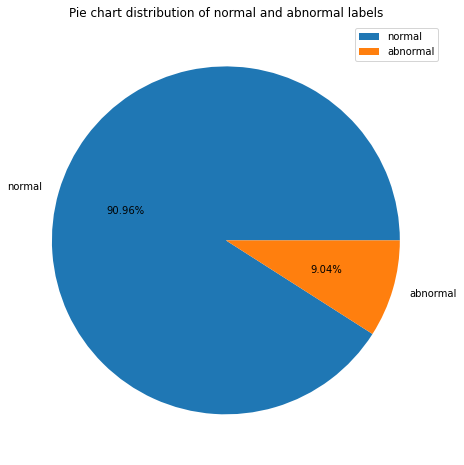

In [61]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
# plt.savefig('plots/Pie_chart_binary.png')
plt.show()

In [62]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = awid.copy()
multi_label = pd.DataFrame(multi_data.label)


In [63]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label


In [64]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,intrusion,flooding,impersonation,injection,normal,label
0,-2.156096,-0.314238,-0.314238,-2.156096,-0.382472,-0.382472,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal
1,-2.156068,3.490272,3.490272,-2.156068,-0.496771,-0.496771,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal
2,-2.156066,-0.058576,-0.058576,-2.156066,-0.496771,-0.496771,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal
3,-2.156003,8.358026,8.358026,-2.156003,-0.535873,-0.535873,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal
4,-2.156002,-0.249186,-0.249186,-2.156002,-0.693786,-0.693786,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,1.993475,-0.313297,-0.313297,1.993475,-0.714841,-0.714841,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal
1795571,1.993480,0.480021,0.480021,1.993480,-0.552416,-0.552416,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal
1795572,1.993492,1.291209,1.291209,1.993492,-0.693786,-0.693786,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal
1795573,1.993492,-0.313140,-0.313140,1.993492,-0.714841,-0.714841,0.020847,0.020847,0.020847,0.020847,...,0,-0.132226,0,-0.668405,3,0,0,0,1,normal


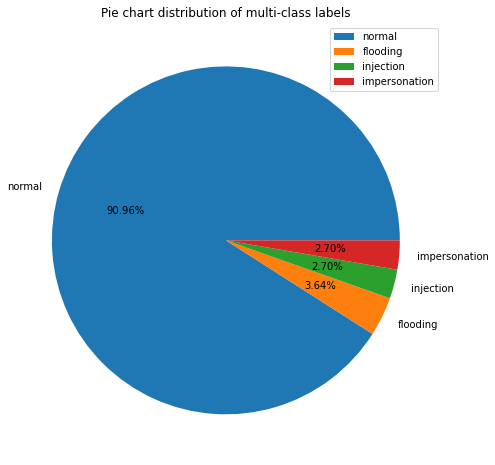

In [65]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
# plt.savefig('plots/Pie_chart_multi.png')
plt.show()

In [66]:
# creating a dataframe with only numeric attributes of binary class datase
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']


<ipython-input-66-45eafe11c111>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = bin_data['intrusion']


In [67]:
# finding the attributes which have more than 0.5 correlation with encoded
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.2]
highest_corr.sort_values(ascending=True)


frame.len                     0.200726
frame.cap_len                 0.200726
radiotap.datarate             0.320679
radiotap.channel.type.ofdm    0.350331
radiotap.channel.type.cck     0.350639
wlan.fc.pwrmgt                0.374274
wlan.fc.subtype               0.398813
intrusion                     1.000000
Name: intrusion, dtype: float64

In [68]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['frame.len','frame.cap_len','radiotap.datarate','wlan.fc.type_subtype','radiotap.channel.type.ofdm',
                         'radiotap.channel.type.cck','wlan.fc.pwrmgt','wlan.fc.subtype']]

In [69]:
# # joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [70]:
# creating a dataframe with only numeric attributes of multi-class dataset
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']


<ipython-input-70-8c0b7b255e5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


In [71]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.2]
highest_corr.sort_values(ascending=True)

wlan.fc.subtype               0.239970
radiotap.datarate             0.291388
radiotap.channel.type.ofdm    0.318332
radiotap.channel.type.cck     0.318612
wlan.fc.pwrmgt                0.361177
intrusion                     1.000000
Name: intrusion, dtype: float64

In [72]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['wlan.fc.subtype','radiotap.datarate','radiotap.channel.type.ofdm',
                        'radiotap.channel.type.cck','wlan.fc.pwrmgt']]

In [73]:
# joining the selected attribute with the one-hot-encoded categorical data
numeric_multi = numeric_multi.join(categorical)
multi_data = numeric_multi.join(multi_data[['intrusion','flooding','impersonation','injection','normal','label']])

In [74]:
multi_data

,wlan.fc.subtype,radiotap.datarate,radiotap.channel.type.ofdm,radiotap.channel.type.cck,wlan.fc.pwrmgt,wlan.fc.type_subtype_0x00,wlan.fc.type_subtype_0x01,wlan.fc.type_subtype_0x02,wlan.fc.type_subtype_0x03,wlan.fc.type_subtype_0x04,...,wlan.fc.type_subtype_0x2c,wlan.fc.ds_0x00,wlan.fc.ds_0x01,wlan.fc.ds_0x02,intrusion,flooding,impersonation,injection,normal,label
0,-0.119591,-1.017004,-1.111039,1.112016,-0.154291,0,0,0,0,0,...,0,1,0,0,3,0,0,0,1,normal
1,-0.119591,-1.017004,-1.111039,1.112016,-0.154291,0,0,0,0,0,...,0,1,0,0,3,0,0,0,1,normal
2,-0.119591,-1.017004,-1.111039,1.112016,-0.154291,0,0,0,0,0,...,0,1,0,0,3,0,0,0,1,normal
3,-0.119591,-1.017004,-1.111039,1.112016,-0.154291,0,0,0,0,0,...,0,1,0,0,3,0,0,0,1,normal
4,-1.078131,0.963120,0.900058,-0.899268,-0.154291,0,0,0,0,0,...,0,0,1,0,3,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,1.078584,-0.048007,0.900058,-0.899268,-0.154291,0,0,0,0,0,...,0,1,0,0,3,0,0,0,1,normal
1795571,-0.119591,-1.017004,-1.111039,1.112016,-0.154291,0,0,0,0,0,...,0,1,0,0,3,0,0,0,1,normal
1795572,-1.078131,1.215901,0.900058,-0.899268,-0.154291,0,0,0,0,0,...,0,0,1,0,3,0,0,0,1,normal
1795573,1.078584,-0.048007,0.900058,-0.899268,-0.154291,0,0,0,0,0,...,0,1,0,0,3,0,0,0,1,normal


In [75]:
bin_data

,frame.len,frame.cap_len,radiotap.datarate,wlan.fc.type_subtype,radiotap.channel.type.ofdm,radiotap.channel.type.cck,wlan.fc.pwrmgt,wlan.fc.subtype,wlan.fc.type_subtype_0x00,wlan.fc.type_subtype_0x01,...,wlan.fc.type_subtype_0x24,wlan.fc.type_subtype_0x28,wlan.fc.type_subtype_0x2c,wlan.fc.ds_0x00,wlan.fc.ds_0x01,wlan.fc.ds_0x02,intrusion,abnormal,normal,label
0,-0.382472,-0.382472,-1.017004,0x08,-1.111039,1.112016,-0.154291,-0.119591,0,0,...,0,0,0,1,0,0,1,0,1,normal
1,-0.496771,-0.496771,-1.017004,0x08,-1.111039,1.112016,-0.154291,-0.119591,0,0,...,0,0,0,1,0,0,1,0,1,normal
2,-0.496771,-0.496771,-1.017004,0x08,-1.111039,1.112016,-0.154291,-0.119591,0,0,...,0,0,0,1,0,0,1,0,1,normal
3,-0.535873,-0.535873,-1.017004,0x08,-1.111039,1.112016,-0.154291,-0.119591,0,0,...,0,0,0,1,0,0,1,0,1,normal
4,-0.693786,-0.693786,0.963120,0x24,0.900058,-0.899268,-0.154291,-1.078131,0,0,...,1,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,-0.714841,-0.714841,-0.048007,0x1d,0.900058,-0.899268,-0.154291,1.078584,0,0,...,0,0,0,1,0,0,1,0,1,normal
1795571,-0.552416,-0.552416,-1.017004,0x08,-1.111039,1.112016,-0.154291,-0.119591,0,0,...,0,0,0,1,0,0,1,0,1,normal
1795572,-0.693786,-0.693786,1.215901,0x24,0.900058,-0.899268,-0.154291,-1.078131,0,0,...,1,0,0,0,1,0,1,0,1,normal
1795573,-0.714841,-0.714841,-0.048007,0x1d,0.900058,-0.899268,-0.154291,1.078584,0,0,...,0,0,0,1,0,0,1,0,1,normal


In [76]:
c=['wlan.fc.type_subtype']

In [77]:
bin_data.drop(labels=c, axis=1, inplace=True)

In [78]:
bin_data

,frame.len,frame.cap_len,radiotap.datarate,radiotap.channel.type.ofdm,radiotap.channel.type.cck,wlan.fc.pwrmgt,wlan.fc.subtype,wlan.fc.type_subtype_0x00,wlan.fc.type_subtype_0x01,wlan.fc.type_subtype_0x02,...,wlan.fc.type_subtype_0x24,wlan.fc.type_subtype_0x28,wlan.fc.type_subtype_0x2c,wlan.fc.ds_0x00,wlan.fc.ds_0x01,wlan.fc.ds_0x02,intrusion,abnormal,normal,label
0,-0.382472,-0.382472,-1.017004,-1.111039,1.112016,-0.154291,-0.119591,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
1,-0.496771,-0.496771,-1.017004,-1.111039,1.112016,-0.154291,-0.119591,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
2,-0.496771,-0.496771,-1.017004,-1.111039,1.112016,-0.154291,-0.119591,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
3,-0.535873,-0.535873,-1.017004,-1.111039,1.112016,-0.154291,-0.119591,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
4,-0.693786,-0.693786,0.963120,0.900058,-0.899268,-0.154291,-1.078131,0,0,0,...,1,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,-0.714841,-0.714841,-0.048007,0.900058,-0.899268,-0.154291,1.078584,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
1795571,-0.552416,-0.552416,-1.017004,-1.111039,1.112016,-0.154291,-0.119591,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
1795572,-0.693786,-0.693786,1.215901,0.900058,-0.899268,-0.154291,-1.078131,0,0,0,...,1,0,0,0,1,0,1,0,1,normal
1795573,-0.714841,-0.714841,-0.048007,0.900058,-0.899268,-0.154291,1.078584,0,0,0,...,0,0,0,1,0,0,1,0,1,normal


In [79]:
X = bin_data.iloc[:,0:31].to_numpy() # dataset excluding target attribute
Y = bin_data['intrusion'] 

In [80]:

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [81]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train) 

LinearDiscriminantAnalysis()

In [82]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.1953155978917


In [83]:

# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.85      0.70      0.77     40747
      normal       0.97      0.99      0.98    408147

    accuracy                           0.96    448894
   macro avg       0.91      0.84      0.87    448894
weighted avg       0.96      0.96      0.96    448894



In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 28552,  12195],
       [  4884, 403263]])

In [85]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03804684402108293
Mean Squared Error -  0.03804684402108293
Root Mean Squared Error -  0.19505600226879186
R2 Score -  54.22213268808107
Accuracy -  96.1953155978917


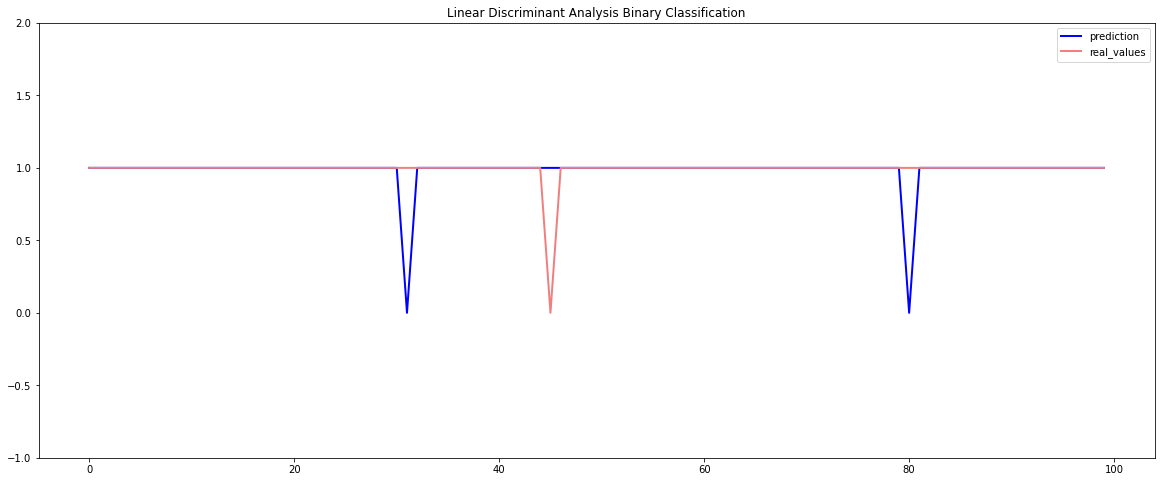

In [86]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear Discriminant Analysis Binary Classification")
# plt.savefig('plots/lda_real_pred_bin.png')
plt.show()

In [87]:
#quadratic discriminanat analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [88]:

y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  78.14784782153471


In [89]:

# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.29      1.00      0.45     40747
      normal       1.00      0.76      0.86    408147

    accuracy                           0.78    448894
   macro avg       0.65      0.88      0.66    448894
weighted avg       0.94      0.78      0.83    448894



In [90]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.21852152178465295
Mean Squared Error -  0.21852152178465295
Root Mean Squared Error -  0.4674628560481067
R2 Score -  -106.91479428071604
Accuracy -  78.14784782153471


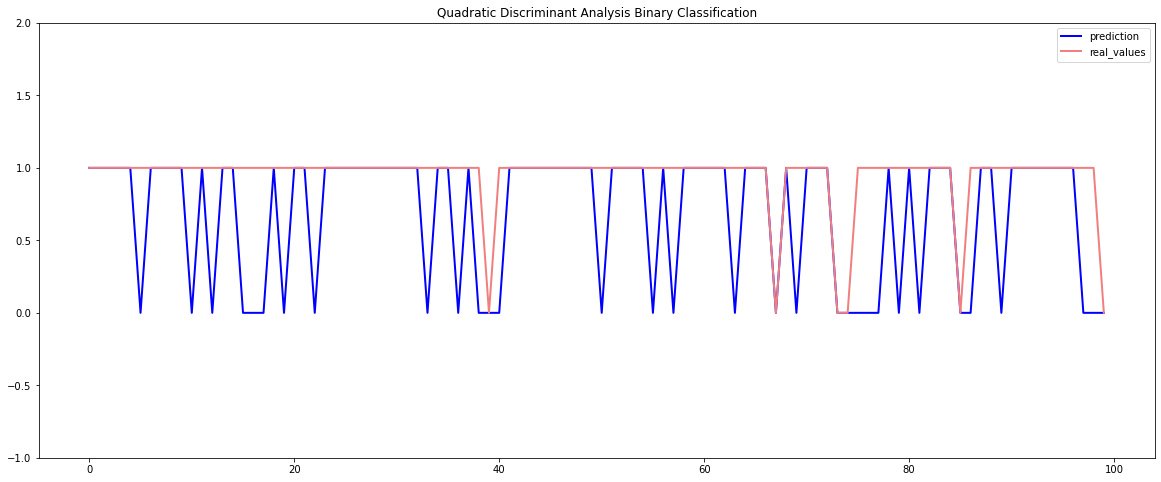

In [91]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic Discriminant Analysis Binary Classification")
# plt.savefig('plots/qda_real_pred_bin.png')
plt.show()

In [92]:
X = bin_data.iloc[:,0:31].values # dataset excluding target attribute (en
Y = bin_data[['intrusion']].values

In [93]:

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [94]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time
import tqdm
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from mpl_toolkits import mplot3d
from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from scipy.spatial.distance import euclidean
import random
import seaborn as sns

In [95]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [96]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:

# summary of model layers
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [98]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
216/216 [==============================] - 1s 6ms/step - loss: 0.2660 - accuracy: 0.9174 - val_loss: 0.1277 - val_accuracy: 0.9630
Epoch 2/100
216/216 [==============================] - 1s 5ms/step - loss: 0.1063 - accuracy: 0.9696 - val_loss: 0.0952 - val_accuracy: 0.9718
Epoch 3/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0910 - accuracy: 0.9724 - val_loss: 0.0889 - val_accuracy: 0.9723
Epoch 4/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0873 - accuracy: 0.9726 - val_loss: 0.0866 - val_accuracy: 0.9723
Epoch 5/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0857 - accuracy: 0.9726 - val_loss: 0.0854 - val_accuracy: 0.9723
Epoch 6/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0845 - val_accuracy: 0.9724
Epoch 7/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0840 - accuracy: 0.9727 - val_loss: 0.0839 - val_accuracy: 0.9724

Epoch 58/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0650 - accuracy: 0.9772 - val_loss: 0.0654 - val_accuracy: 0.9769
Epoch 59/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0649 - accuracy: 0.9772 - val_loss: 0.0653 - val_accuracy: 0.9769
Epoch 60/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0648 - accuracy: 0.9772 - val_loss: 0.0650 - val_accuracy: 0.9769
Epoch 61/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0648 - accuracy: 0.9773 - val_loss: 0.0649 - val_accuracy: 0.9769
Epoch 62/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0647 - accuracy: 0.9773 - val_loss: 0.0651 - val_accuracy: 0.9772
Epoch 63/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0647 - accuracy: 0.9773 - val_loss: 0.0648 - val_accuracy: 0.9771
Epoch 64/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0646 - accuracy: 0.9774 - val_loss: 0.0650 - val_accuracy:

In [99]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

14028/14028 [==============================] - 10s 734us/step - loss: 0.0640 - accuracy: 0.9775
Test results - Loss: 0.06401870399713516 - Accuracy: 97.75158762931824


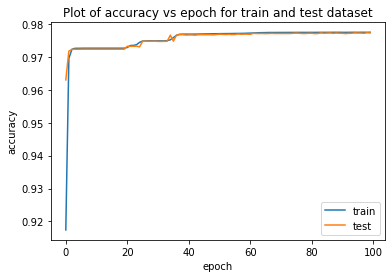

In [101]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_binary_accuracy.png')
plt.show()

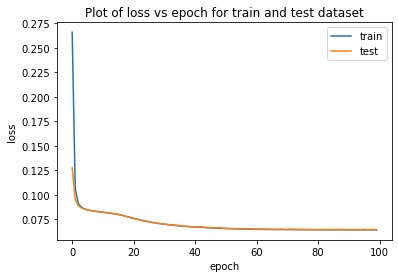

In [102]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_binary_loss.png')
plt.show()

In [103]:
y_pred = mlp.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

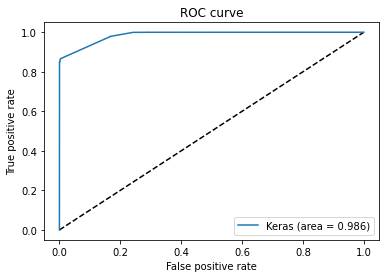

In [104]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
# plt.savefig('plots/mlp_binary_roc.png')
plt.show()

In [105]:

pred = mlp.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

In [106]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.999191467779991
F1 Score -  0.9877768318100292
Precision Score -  0.9766200488529144


In [107]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03880379306911647
Mean Squared Error -  0.018832267847180905
Root Mean Squared Error -  0.1372307102917598
R2 Score -  77.18423484591825


In [108]:
#LSTM
X = bin_data.iloc[:,0:31] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']]

In [109]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [110]:
X_train = X_train.values

In [111]:
y_train = np.array(y_train)

In [112]:

x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [113]:
x_train.shape

(1346681, 1, 31)

In [114]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=31))

# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))

In [115]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [116]:
# summary of model layers
lst.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                16400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 16,451
Trainable params: 16,451
Non-trainable params: 0
_________________________________________________________________


In [117]:

# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
216/216 [==============================] - 5s 22ms/step - loss: 0.2971 - accuracy: 0.9155 - val_loss: 0.1399 - val_accuracy: 0.9629
Epoch 2/100
216/216 [==============================] - 4s 19ms/step - loss: 0.1102 - accuracy: 0.9706 - val_loss: 0.0949 - val_accuracy: 0.9717
Epoch 3/100
216/216 [==============================] - 4s 19ms/step - loss: 0.0905 - accuracy: 0.9723 - val_loss: 0.0882 - val_accuracy: 0.9722
Epoch 4/100
216/216 [==============================] - 5s 21ms/step - loss: 0.0864 - accuracy: 0.9726 - val_loss: 0.0855 - val_accuracy: 0.9723
Epoch 5/100
216/216 [==============================] - 4s 19ms/step - loss: 0.0845 - accuracy: 0.9727 - val_loss: 0.0842 - val_accuracy: 0.9724
Epoch 6/100
216/216 [==============================] - 4s 18ms/step - loss: 0.0834 - accuracy: 0.9727 - val_loss: 0.0830 - val_accuracy: 0.9724
Epoch 7/100
216/216 [==============================] - 4s 17ms/step - loss: 0.0824 - accuracy: 0.9727 - val_loss: 0.0824 - val_accuracy:

216/216 [==============================] - 3s 16ms/step - loss: 0.0641 - accuracy: 0.9775 - val_loss: 0.0643 - val_accuracy: 0.9772
Epoch 58/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0641 - accuracy: 0.9775 - val_loss: 0.0643 - val_accuracy: 0.9772
Epoch 59/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0641 - accuracy: 0.9775 - val_loss: 0.0644 - val_accuracy: 0.9772
Epoch 60/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0641 - accuracy: 0.9775 - val_loss: 0.0643 - val_accuracy: 0.9773
Epoch 61/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0640 - accuracy: 0.9775 - val_loss: 0.0644 - val_accuracy: 0.9772
Epoch 62/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0640 - accuracy: 0.9775 - val_loss: 0.0642 - val_accuracy: 0.9773
Epoch 63/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0641 - accuracy: 0.9775 - val_loss: 0.0643 - val_accuracy: 0.977

In [118]:
X_test = X_test.to_numpy()

In [119]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [120]:

# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [121]:

# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

14028/14028 [==============================] - 16s 1ms/step - loss: 0.0635 - accuracy: 0.9775
Test results - Loss: 0.06352519243955612 - Accuracy: 97.7495789527893%


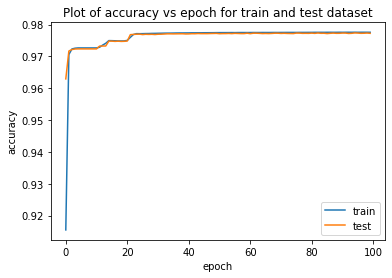

In [122]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

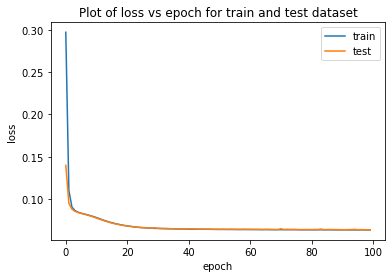

In [123]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/lstm_binary_loss.png')
plt.show()

In [124]:

y_test.shape

(448894, 1)

In [125]:

y_pred = lst.predict(x_test)

In [126]:

y_pred.shape
     

(448894, 1)

In [127]:
y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# auc = auc(fpr, tpr)

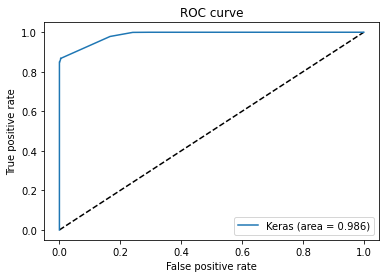

In [128]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
# plt.savefig('plots/lstm_binary_roc.png')
plt.show()

In [129]:

y_classes = (lst.predict(x_test)>0.5).astype('int32')

In [130]:

print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9992772211972647
F1 Score -  0.9877671026851343
Precision Score -  0.9765191220589046


In [131]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03702137745348408
Mean Squared Error -  0.01879503442825228
Root Mean Squared Error -  0.1370949832351727
R2 Score -  77.22813253889713


In [132]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [133]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [134]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [135]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [136]:

# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [137]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 31)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1600      
_________________________________________________________________
dense_4 (Dense)              (None, 31)                1581      
Total params: 3,181
Trainable params: 3,181
Non-trainable params: 0
_________________________________________________________________


In [138]:

# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2208 - accuracy: 0.7946 - val_loss: 0.2189 - val_accuracy: 0.7152
Epoch 2/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8483 - val_loss: 0.2189 - val_accuracy: 0.7025
Epoch 3/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8498 - val_loss: 0.2189 - val_accuracy: 0.9805
Epoch 4/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8456 - val_loss: 0.2189 - val_accuracy: 0.9779
Epoch 5/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8434 - val_loss: 0.2189 - val_accuracy: 0.6993
Epoch 6/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8463 - val_loss: 0.2189 - val_accuracy: 0.9866
Epoch 7/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8460 - val_loss: 0.2189 - val_ac

2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8483 - val_loss: 0.2189 - val_accuracy: 0.7011
Epoch 58/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8460 - val_loss: 0.2189 - val_accuracy: 0.9919
Epoch 59/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8462 - val_loss: 0.2189 - val_accuracy: 0.7084
Epoch 60/100
2694/2694 [==============================] - 7s 3ms/step - loss: 0.2185 - accuracy: 0.8476 - val_loss: 0.2189 - val_accuracy: 0.9591
Epoch 61/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8459 - val_loss: 0.2189 - val_accuracy: 0.9964
Epoch 62/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8471 - val_loss: 0.2189 - val_accuracy: 0.7130
Epoch 63/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.2185 - accuracy: 0.8445 - val_loss: 0.2189 - val_accuracy

In [139]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [140]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

14028/14028 [==============================] - 9s 627us/step - loss: 0.2189 - accuracy: 0.9844
Test results - Loss: 0.21887622773647308 - Accuracy: 0.9843615889549255%


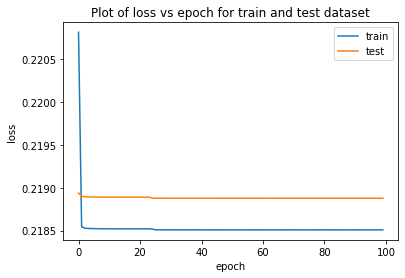

In [141]:

# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('plots/ae_binary_loss.png')
plt.show()

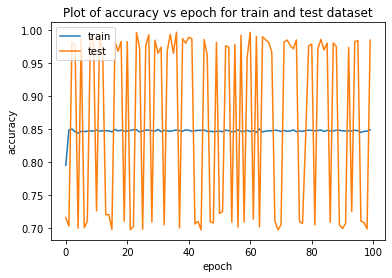

In [142]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/ae_binary_accuracy.png')
plt.show()

In [143]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

In [144]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
     

In [145]:
mse

array([0.17792307, 0.23792584, 0.18901577, ..., 0.12796072, 0.17739816,
       0.23792584])

In [146]:

error_df.describe()

,reconstruction_error,true_class
count,448894.000000,448894.000000
mean,0.218877,0.909228
std,0.173535,0.287285
min,0.069056,0.000000
25%,0.136574,1.000000
50%,0.189016,1.000000
75%,0.237926,1.000000
max,1.312467,1.000000


In [147]:

i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 50 neurons
fvector = Dense(50, activation="sigmoid")(i_layer)                    
#doutput layer
o_layer = Dense(1, activation='sigmoid')(fvector)

In [148]:

# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [149]:

# summary of model layers
ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 31)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1600      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [150]:

# training the model on training dataset
his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
719/719 [==============================] - 2s 3ms/step - loss: 0.2507 - accuracy: 0.9090 - val_loss: 0.1868 - val_accuracy: 0.9101
Epoch 2/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1684 - accuracy: 0.9442 - val_loss: 0.1523 - val_accuracy: 0.9584
Epoch 3/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1490 - accuracy: 0.9568 - val_loss: 0.1403 - val_accuracy: 0.9584
Epoch 4/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1408 - accuracy: 0.9568 - val_loss: 0.1352 - val_accuracy: 0.9584
Epoch 5/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1373 - accuracy: 0.9568 - val_loss: 0.1333 - val_accuracy: 0.9584
Epoch 6/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1358 - accuracy: 0.9568 - val_loss: 0.1320 - val_accuracy: 0.9584
Epoch 7/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1350 - accuracy: 0.9568 - val_loss: 0.1316 - val_accuracy: 0.9584

Epoch 58/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1258 - accuracy: 0.9584 - val_loss: 0.1227 - val_accuracy: 0.9599
Epoch 59/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1258 - accuracy: 0.9584 - val_loss: 0.1227 - val_accuracy: 0.9599
Epoch 60/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1258 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 61/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1257 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 62/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1257 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 63/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1257 - accuracy: 0.9584 - val_loss: 0.1227 - val_accuracy: 0.9599
Epoch 64/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1257 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy:

Epoch 115/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 116/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 117/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1224 - val_accuracy: 0.9599
Epoch 118/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 119/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 120/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 121/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_ac

719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 172/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 173/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 174/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 175/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1229 - val_accuracy: 0.9599
Epoch 176/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 177/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599

719/719 [==============================] - 2s 3ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 228/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 229/300
719/719 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1227 - val_accuracy: 0.9599
Epoch 230/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 231/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 232/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 233/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1224 - val_accuracy: 0.9599

719/719 [==============================] - 2s 3ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 284/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1228 - val_accuracy: 0.9599
Epoch 285/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 286/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 287/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 288/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy: 0.9599
Epoch 289/300
719/719 [==============================] - 2s 3ms/step - loss: 0.1255 - accuracy: 0.9584 - val_loss: 0.1224 - val_accuracy: 0.9599

In [151]:
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [152]:

# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

14028/14028 [==============================] - 12s 856us/step - loss: 4.9170 - accuracy: 0.6429
Test results - Loss: 4.9170451164245605 - Accuracy: 64.29424285888672%


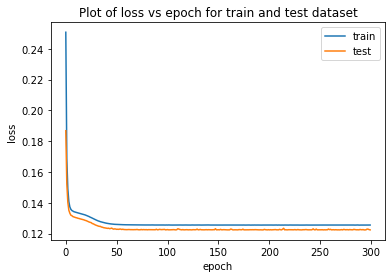

In [153]:

# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('plots/ae_classifier_binary_loss.png')
plt.show()

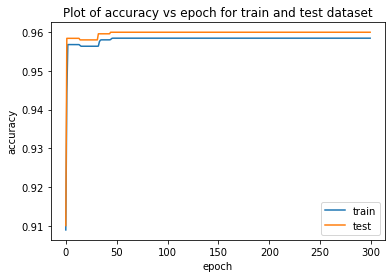

In [154]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/ae_classifier_binary_accuracy.png')
plt.show()

In [155]:

y_pred = ae_classifier.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

No handles with labels found to put in legend.


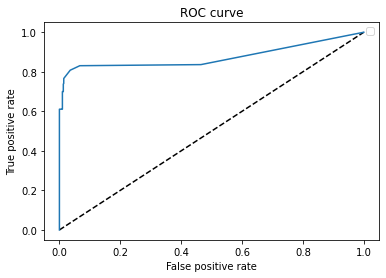

In [156]:
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
# plt.savefig('plots/ae_binary_roc.png')
plt.show()

In [157]:

pred = ae_classifier.predict(X_test)
y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

In [158]:

print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.6072959007416445
F1 Score -  0.7556740491423188
Precision Score -  1.0


In [159]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.35709375224803164
Mean Squared Error -  0.3569939801172468
Root Mean Squared Error -  0.5974897322274642
R2 Score -  -178.04604440598843


In [160]:
X = multi_data.iloc[:,0:29].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['intrusion'] 

In [161]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [162]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [163]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.00306531163258


In [164]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

               precision    recall  f1-score   support

     flooding       1.00      0.32      0.49     12203
impersonation       0.81      0.68      0.74     12168
    injection       0.81      1.00      0.90     16376
       normal       0.97      0.99      0.98    408147

     accuracy                           0.96    448894
    macro avg       0.90      0.75      0.77    448894
 weighted avg       0.96      0.96      0.96    448894



In [165]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)
     


Mean Absolute Error -  0.09001456914104443
Mean Squared Error -  0.22703578127575774
Root Mean Squared Error -  0.47648271875877907
R2 Score -  37.774328148651
Accuracy -  96.00306531163258


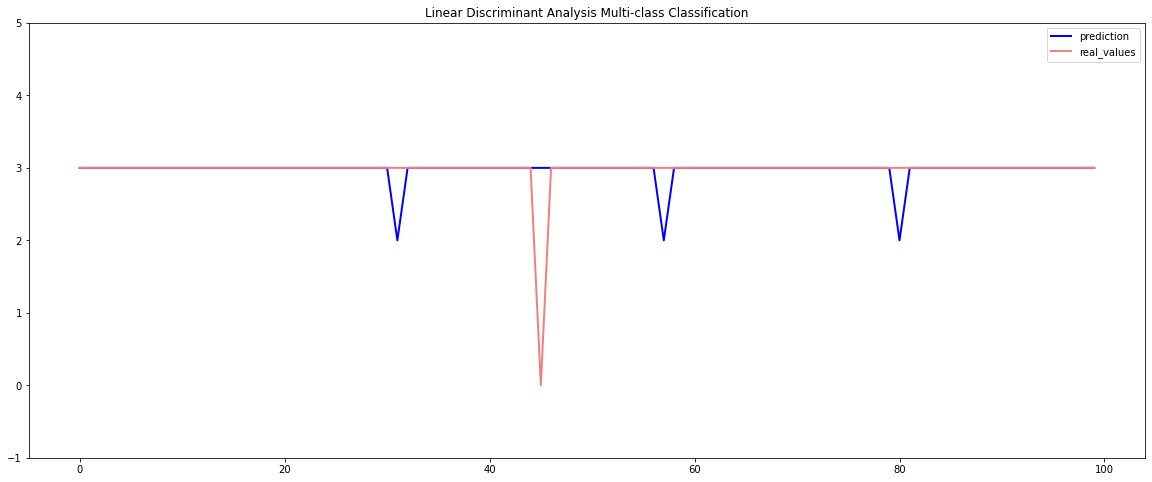

In [166]:

plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear Discriminant Analysis Multi-class Classification")
# plt.savefig('plots/lda_real_pred_multi.png')
plt.show()

In [167]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) 

/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [168]:
y_pred = qda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Multi-class Set-Accuracy is ", ac)

QDA-Classifier Multi-class Set-Accuracy is  77.92775131768302


In [169]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

               precision    recall  f1-score   support

     flooding       0.12      1.00      0.21     12203
impersonation       0.54      0.92      0.68     12168
    injection       0.99      1.00      1.00     16376
       normal       1.00      0.76      0.86    408147

     accuracy                           0.78    448894
    macro avg       0.66      0.92      0.69    448894
 weighted avg       0.96      0.78      0.85    448894



In [170]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.6356868213876773
Mean Squared Error -  1.8590357634541785
Root Mean Squared Error -  1.3634646176025906
R2 Score -  -304.2657010008404
Accuracy -  77.92775131768302


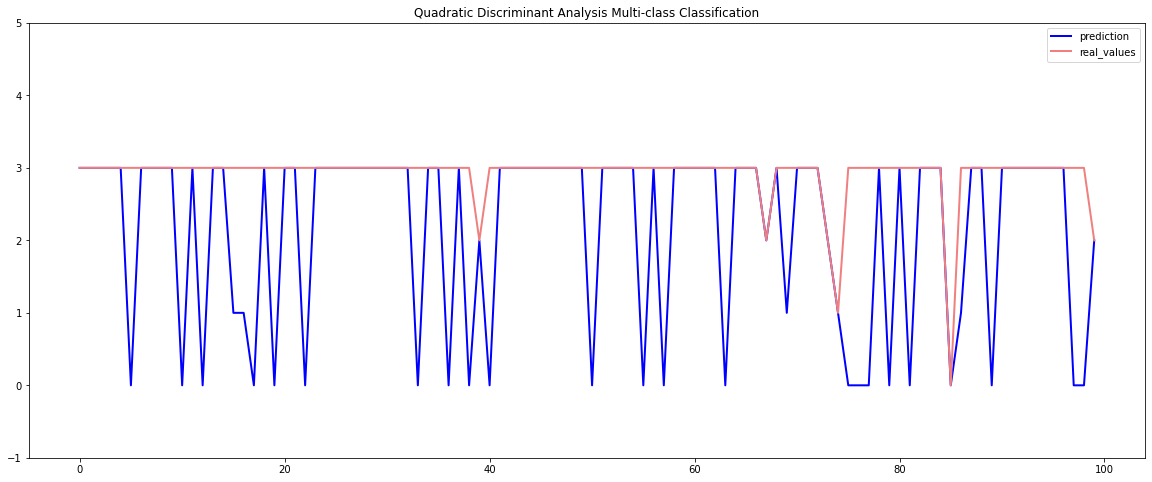

In [171]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic Discriminant Analysis Multi-class Classification")
# plt.savefig('plots/qda_real_pred_multi.png')
plt.show()
     

In [172]:

X = multi_data.iloc[:,0:29]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['flooding','impersonation','injection','normal']] 

In [173]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [174]:
X_train.shape[1]

29

In [175]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=4,activation='softmax'))

In [176]:
X_train.shape[1]

29

In [177]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [178]:
# summary of model layers
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                1500      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 204       
Total params: 1,704
Trainable params: 1,704
Non-trainable params: 0
_________________________________________________________________


In [179]:

# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
216/216 [==============================] - 2s 8ms/step - loss: 0.3593 - accuracy: 0.9303 - val_loss: 0.1415 - val_accuracy: 0.9630
Epoch 2/100
216/216 [==============================] - 1s 7ms/step - loss: 0.1163 - accuracy: 0.9690 - val_loss: 0.1024 - val_accuracy: 0.9724
Epoch 3/100
216/216 [==============================] - 1s 7ms/step - loss: 0.0968 - accuracy: 0.9727 - val_loss: 0.0936 - val_accuracy: 0.9724
Epoch 4/100
216/216 [==============================] - 1s 7ms/step - loss: 0.0916 - accuracy: 0.9727 - val_loss: 0.0907 - val_accuracy: 0.9724
Epoch 5/100
216/216 [==============================] - 1s 7ms/step - loss: 0.0895 - accuracy: 0.9727 - val_loss: 0.0892 - val_accuracy: 0.9724
Epoch 6/100
216/216 [==============================] - 1s 7ms/step - loss: 0.0884 - accuracy: 0.9727 - val_loss: 0.0883 - val_accuracy: 0.9724
Epoch 7/100
216/216 [==============================] - 1s 7ms/step - loss: 0.0876 - accuracy: 0.9727 - val_loss: 0.0876 - val_accuracy: 0.9724

Epoch 58/100
216/216 [==============================] - 1s 7ms/step - loss: 0.0847 - accuracy: 0.9727 - val_loss: 0.0850 - val_accuracy: 0.9724
Epoch 59/100
216/216 [==============================] - 1s 7ms/step - loss: 0.0847 - accuracy: 0.9727 - val_loss: 0.0849 - val_accuracy: 0.9724
Epoch 60/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0850 - val_accuracy: 0.9724
Epoch 61/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0848 - val_accuracy: 0.9724
Epoch 62/100
216/216 [==============================] - 1s 7ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0848 - val_accuracy: 0.9724
Epoch 63/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0848 - val_accuracy: 0.9724
Epoch 64/100
216/216 [==============================] - 1s 6ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0849 - val_accuracy:

In [180]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [181]:

# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

14028/14028 [==============================] - 11s 801us/step - loss: 0.0848 - accuracy: 0.9725
Test results - Loss: 0.08479583263397217 - Accuracy: 97.24612236022949%


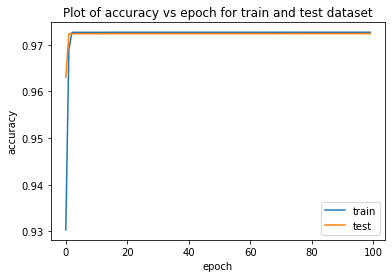

In [182]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

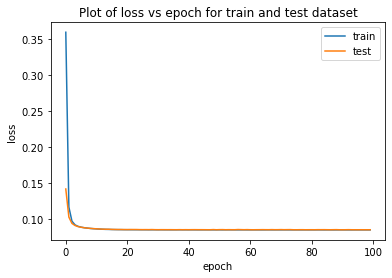

In [183]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('plots/mlp_multi_loss.png')
plt.show()
     

In [184]:
n_classes = len(le2.classes_)
n_classes


4

In [185]:
y_pred = mlp.predict(X_test)

In [186]:
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
#     roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])


In [187]:
# for i in range(n_classes):
#   plt.plot([0, 1], [0, 1], 'k--')
#   plt.plot(fpr_mlp[i], tpr_mlp[i], label='Keras (area = {:.3f})'.format(roc_auc_mlp[i]))
#   plt.xlabel('False positive rate')
#   plt.ylabel('True positive rate')
#   plt.title('ROC curve')
#   plt.legend(loc='best')
# #   plt.savefig('plots/mlp_multi_roc'+str(i)+'.png')
#   plt.show()

In [188]:

pred = mlp.predict(X_test)

In [189]:

for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

In [190]:

pred_df = pd.DataFrame(pred,columns=y_test.columns)

In [191]:

print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

Recall Score -  0.97246120464965
F1 Score -  0.97246120464965
Precision Score -  0.97246120464965


In [192]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.023209466
Mean Squared Error -  0.01177966
Root Mean Squared Error -  0.10853414
R2 Score -  70.60212089122227


In [193]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

In [194]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
y_train = X_train[['normal','flooding','impersonation','injection']]

X_train = X_train.drop(['intrusion','flooding','impersonation','injection','normal','label'],axis=1)

#y_test = X_test['intrusion'] # target attribute
y_test = X_test[['normal','flooding','impersonation','injection']]

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','flooding','impersonation','injection','normal','label'],axis=1)

In [195]:
X = multi_data.iloc[:,0:29]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['flooding','impersonation','injection','normal']] 

In [196]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [197]:
X_train = X_train.values

In [198]:
y_train = np.array(y_train)

In [199]:

x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [200]:
x_train.shape

(1346681, 1, 29)

In [201]:
X_test=X_test.values

In [202]:
y_test=np.array(y_test)

In [203]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [204]:
x_test.shape

(448894, 1, 29)

In [205]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=29))

# outpute layer with sigmoid activation
lst.add(Dense(4,activation='softmax'))

In [206]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [207]:
# summary of model layers
lst.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                16000     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 204       
Total params: 16,204
Trainable params: 16,204
Non-trainable params: 0
_________________________________________________________________


In [208]:

# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
216/216 [==============================] - 4s 17ms/step - loss: 0.5208 - accuracy: 0.9006 - val_loss: 0.1774 - val_accuracy: 0.9719
Epoch 2/100
216/216 [==============================] - 3s 16ms/step - loss: 0.1347 - accuracy: 0.9722 - val_loss: 0.1114 - val_accuracy: 0.9719
Epoch 3/100
216/216 [==============================] - 4s 17ms/step - loss: 0.1029 - accuracy: 0.9726 - val_loss: 0.0977 - val_accuracy: 0.9723
Epoch 4/100
216/216 [==============================] - 3s 15ms/step - loss: 0.0945 - accuracy: 0.9727 - val_loss: 0.0924 - val_accuracy: 0.9724
Epoch 5/100
216/216 [==============================] - 3s 15ms/step - loss: 0.0907 - accuracy: 0.9727 - val_loss: 0.0897 - val_accuracy: 0.9724
Epoch 6/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0886 - accuracy: 0.9727 - val_loss: 0.0882 - val_accuracy: 0.9724
Epoch 7/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0874 - accuracy: 0.9727 - val_loss: 0.0873 - val_accuracy:

216/216 [==============================] - 3s 16ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0849 - val_accuracy: 0.9724
Epoch 58/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0849 - val_accuracy: 0.9724
Epoch 59/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0848 - val_accuracy: 0.9724
Epoch 60/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0848 - val_accuracy: 0.9724
Epoch 61/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0847 - accuracy: 0.9727 - val_loss: 0.0850 - val_accuracy: 0.9724
Epoch 62/100
216/216 [==============================] - 3s 16ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0848 - val_accuracy: 0.9724
Epoch 63/100
216/216 [==============================] - 3s 15ms/step - loss: 0.0846 - accuracy: 0.9727 - val_loss: 0.0850 - val_accuracy: 0.972

In [209]:

# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [210]:
test_results[0]

0.08479583263397217

In [211]:

# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

14028/14028 [==============================] - 16s 1ms/step - loss: 0.0848 - accuracy: 0.9725
Test results - Loss: 0.08475415408611298 - Accuracy: 97.24612236022949%


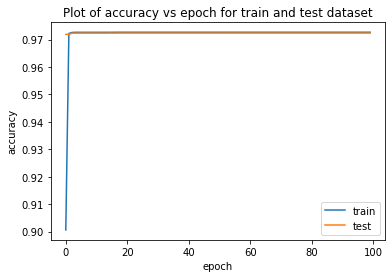

In [212]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

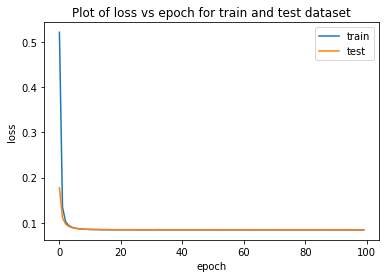

In [213]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/lstm_binary_loss.png')
plt.show()

In [214]:

print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

Recall Score -  0.97246120464965
F1 Score -  0.97246120464965
Precision Score -  0.97246120464965


In [215]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.023209466
Mean Squared Error -  0.01177966
Root Mean Squared Error -  0.10853414
R2 Score -  70.60212089122227


In [216]:

print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

Recall Score -  0.97246120464965
F1 Score -  0.97246120464965
Precision Score -  0.97246120464965


In [217]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.023209466
Mean Squared Error -  0.01177966
Root Mean Squared Error -  0.10853414
R2 Score -  70.60212089122227


In [218]:
X = multi_data.iloc[:,0:29]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['normal','flooding','impersonation','injection']]

In [219]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [220]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [221]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [222]:

# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [223]:
# summary of model layers
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                1500      
_________________________________________________________________
dense_11 (Dense)             (None, 29)                1479      
Total params: 2,979
Trainable params: 2,979
Non-trainable params: 0
_________________________________________________________________


In [224]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1747 - accuracy: 0.9580 - val_loss: 0.1731 - val_accuracy: 0.9838
Epoch 2/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9806 - val_loss: 0.1730 - val_accuracy: 0.9804
Epoch 3/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9809 - val_loss: 0.1730 - val_accuracy: 0.9809
Epoch 4/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9825 - val_loss: 0.1730 - val_accuracy: 0.9767
Epoch 5/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9850 - val_loss: 0.1730 - val_accuracy: 0.9951
Epoch 6/100
2694/2694 [==============================] - 7s 3ms/step - loss: 0.1727 - accuracy: 0.9854 - val_loss: 0.1730 - val_accuracy: 0.9951
Epoch 7/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9862 - val_loss: 0.1730 - val_ac

2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9854 - val_loss: 0.1730 - val_accuracy: 0.9969
Epoch 58/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9853 - val_loss: 0.1730 - val_accuracy: 0.9969
Epoch 59/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9854 - val_loss: 0.1730 - val_accuracy: 0.9772
Epoch 60/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9856 - val_loss: 0.1730 - val_accuracy: 0.9767
Epoch 61/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9856 - val_loss: 0.1730 - val_accuracy: 0.9969
Epoch 62/100
2694/2694 [==============================] - 8s 3ms/step - loss: 0.1727 - accuracy: 0.9856 - val_loss: 0.1730 - val_accuracy: 0.9945
Epoch 63/100
2694/2694 [==============================] - 7s 3ms/step - loss: 0.1727 - accuracy: 0.9858 - val_loss: 0.1730 - val_accuracy

KeyboardInterrupt: 

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:

# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('plots/ae_multi_loss.png')
plt.show()

In [ ]:

# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/ae_multi_accuracy.png')
plt.show()
     

In [ ]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

In [ ]:

i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 48 neurons
fvector = Dense(48, activation="sigmoid")(i_layer)   
#fvector = Dense(24, activation='tanh')(fvector)                 
#doutput layer
o_layer = Dense(4, activation='sigmoid')(fvector)
     

In [ ]:

# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:

ae_classifier.summary()

In [ ]:

# training the model on training dataset
his = ae_classifier.fit(predictions, y_test, epochs=200,batch_size=700, validation_split=0.2).history

In [ ]:

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('plots/ae_classifier_multi_loss.png')
plt.show()

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/ae_classifier_multi_accuracy.png')
plt.show()

In [ ]:

y_pred = ae_classifier.predict(X_test)

In [ ]:
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc_ae[i] = auc(fpr_ae[i], tpr_ae[i])

In [ ]:

for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_ae[i], tpr_ae[i], label='Keras (area = {:.3f})'.format(roc_auc_ae[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
#   plt.savefig('plots/ae_classifier_multi_roc'+str(i)+'.png')
  plt.show()

In [ ]:

for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))

In [ ]:

print("Recall Score - ",recall_score(y_test,y_pred.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,y_pred.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,y_pred.astype('uint8'),average='micro'))

In [ ]:

print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

In [ ]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
# print("Accuracy - ",accuracy_score(y_test,y_pred)*100)